In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [23]:
base_dir = 'https://dapds00.nci.org.au/thredds/dodsC/wr45/'
base_dir += 'ops_aps3/access-dn/1/'

u = xr.open_dataset(base_dir + '20210127/1200/fc/ml/wnd_ucmp.nc')
w = xr.open_dataset(base_dir + '20210127/1200/fc/ml/vertical_wnd.nc')

In [26]:
cs_u = u.sel(time=np.datetime64('2021-01-28T12:00')).sel(lat=-12.22820, method='nearest')
cs_u = cs_u.sel(lon=slice(131, 132)).sel(rho_lvl=slice(0, 20000))

cs_w = w.sel(time=np.datetime64('2021-01-28T12:00')).sel(lat=-12.22820, method='nearest')
cs_w = cs_w.sel(lon=slice(131, 132)).sel(theta_lvl=slice(0, 20000))

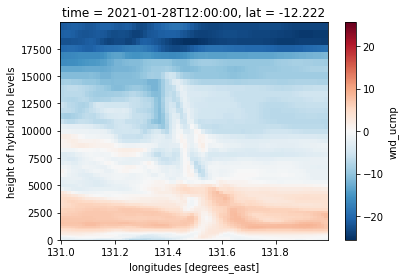

In [31]:
(cs_u['wnd_ucmp']-5).plot()

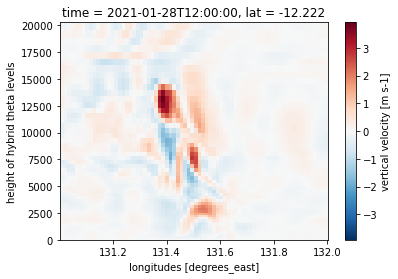

In [28]:
cs_w['vertical_wnd'].plot()

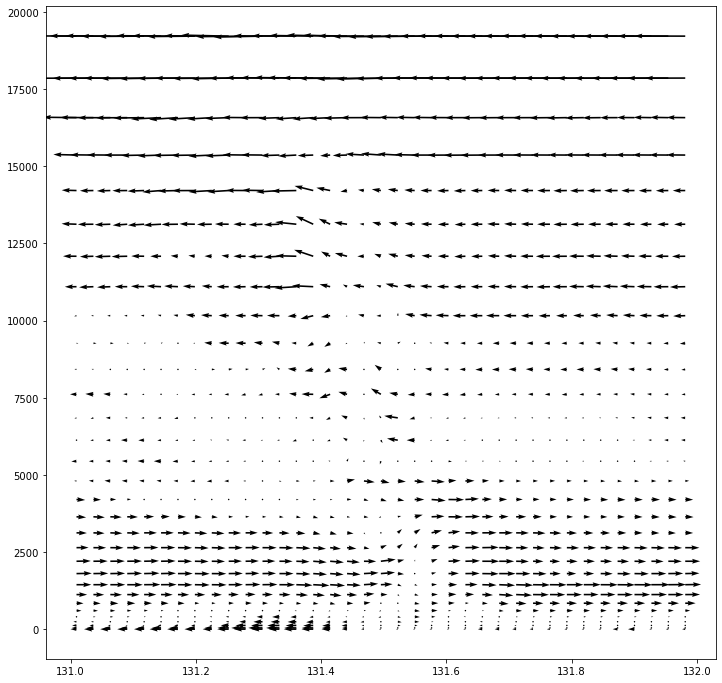

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

step = 2

X, Y = np.meshgrid(cs_w.lon[::step], cs_w.theta_lvl[::step])

ax.quiver(X, Y,
    (cs_u['wnd_ucmp']-5).values[::step, ::step], 
    cs_w['vertical_wnd'].values[::step, ::step])